In [17]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention
from collections import defaultdict
import pandas as pd
import seaborn as sns
import json

In [18]:
page_id = '8'
password_response, time_response, survey_response, dids = get_responses()
questions = get_questions()

Total: 163; 
Attentive: 131; Non Attentive: 32


In [19]:
survey_response_df = pd.DataFrame(survey_response)

csquest = pd.json_normalize(survey_response_df[page_id])
csquest.drop(attention.get(page_id).keys(), axis=1, inplace=True)

qualindex = ['8-1', '10-1', '11-1']
csquestqual = csquest[qualindex]
# csquestqual.to_csv('qualitative/csquest_qual.csv')
csquestqual

csquestquant = csquest.drop(qualindex, axis=1).fillna(4).astype(float)

# normalize scale 1 to 8 to scale -3 to 3
normcsquestquant = csquestquant - 4
csquestquant.update(normcsquestquant)

new_columns = {}
for qsid in csquestquant.columns:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    # print(json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('title'))
    new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
csquestquant.rename(columns=new_columns, inplace=True)

display(csquestquant.head())
display(csquestquant.describe())

,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation
0,1.0,2.0,-1.0,-1.0,-3.0,-3.0,-2.0,1.0,-2.0,0.0,-3.0,-3.0,2.0,-3.0,0.0,-2.0
1,-3.0,1.0,-3.0,0.0,-3.0,-3.0,3.0,-3.0,-3.0,1.0,2.0,1.0,0.0,2.0,-3.0,-3.0
2,1.0,1.0,2.0,2.0,-1.0,-2.0,3.0,-3.0,1.0,2.0,3.0,3.0,-2.0,3.0,0.0,2.0
3,2.0,0.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0
4,0.0,0.0,-3.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0


,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,1.022901,1.015267,0.427481,1.610687,0.694656,0.732824,1.671756,0.839695,1.152672,1.526718,1.839695,1.595420,1.244275,1.564885,1.312977,1.503817
std,1.464795,1.358646,1.727740,1.389923,1.818254,1.708911,1.315252,1.450818,1.511358,1.464074,1.396792,1.423855,1.430931,1.359294,1.347841,1.531083
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.500000,3.000000,3.000000,2.000000,2.500000,2.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [20]:
csquestquant['did'] = dids
did_csquestquant = csquestquant.groupby('did').mean()
did_csquestquant.index = did_csquestquant.index.map(get_design)
did_csquestquant.index.names = ['design']
did_csquestquant


,Portrayal of hacker stimulates,Portrayal of victim encourages,Makes me worried,Encouragement for strong password,Emotional Connection,Personal Connection,Easy to follow,Novel,Attractive,Informative,Easy to understand,To the Point,Creative,Well Organized,Engaging,Real life motivation
design,,,,,,,,,,,,,,,,
logos,0.000000,0.000000,0.481481,2.148148,0.925926,1.222222,1.851852,1.037037,1.814815,2.185185,2.444444,2.296296,1.592593,2.185185,1.703704,2.148148
metaphor,1.230769,1.192308,0.153846,1.538462,0.307692,0.423077,1.384615,1.153846,1.000000,1.269231,1.461538,1.461538,1.384615,1.115385,1.384615,1.307692
personal,1.192308,1.615385,0.423077,1.653846,1.076923,0.769231,1.961538,0.653846,0.961538,1.384615,1.615385,1.230769,1.230769,1.461538,1.076923,1.423077
professional,1.576923,1.384615,0.846154,1.653846,0.807692,0.923077,1.807692,0.884615,1.269231,1.730769,2.115385,1.692308,1.384615,1.846154,1.423077,1.423077
consequences,1.153846,0.923077,0.230769,1.038462,0.346154,0.307692,1.346154,0.461538,0.692308,1.038462,1.538462,1.269231,0.615385,1.192308,0.961538,1.192308


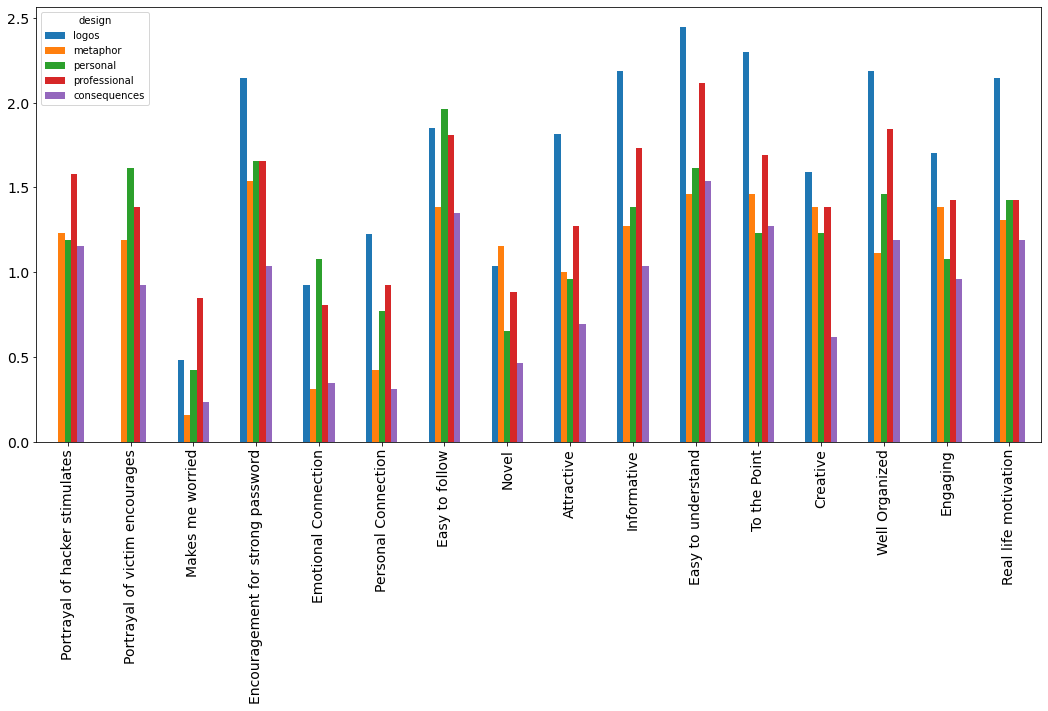

In [22]:
chart = did_csquestquant.T.plot.bar(figsize=(18, 8), fontsize=14, style=".-")

In [ ]:
# chart = did_csquestquant.T.plot(figsize=(18, 8), fontsize=14, style=".-")
# _ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

